<a href="https://colab.research.google.com/github/ShodekeA/MyProjects/blob/main/Credit_card_application_AS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Machine Learning 
### Project: Model Selection

# Abstract

# Part 1: Business and Data Understanding

### Q. Identify a suitable dataset for your canditate question(s)

Go have a look at any of these websites:

* https://www.kaggle.com/datasets 
* https://datasetsearch.research.google.com/
* https://data.gov.uk/

Find an interesting looking data set related to your problem domain and get a copy of it


In [ ]:
# DATASET USED IS CREDIT CARD APPLICATION FROM kaggle.com

### Q. Define the problem domain

In [ ]:
# PREDICTING THE OUTCOME OF CREDIT CARD APPLICATION BASED ON THE APPLCSNT INFO.

### Q. Identify candidate questions for your machine learning project

In [ ]:
#Import libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

#Load the data
data = pd.read_csv('Application_Data.csv')

### Q. Generate a descriptive statistics report for the columns in your dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25128 entries, 0 to 25127
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Applicant_ID          25128 non-null  int64 
 1   Applicant_Gender      25128 non-null  object
 2   Owned_Car             25128 non-null  int64 
 3   Owned_Realty          25128 non-null  int64 
 4   Total_Children        25128 non-null  int64 
 5   Total_Income          25128 non-null  int64 
 6   Income_Type           25128 non-null  object
 7   Education_Type        25128 non-null  object
 8   Family_Status         25128 non-null  object
 9   Housing_Type          25128 non-null  object
 10  Owned_Mobile_Phone    25128 non-null  int64 
 11  Owned_Work_Phone      25128 non-null  int64 
 12  Owned_Phone           25128 non-null  int64 
 13  Owned_Email           25128 non-null  int64 
 14  Job_Title             25128 non-null  object
 15  Total_Family_Members  25128 non-null

In [ ]:
# This dataset has no null values so must have been cleaned to some extent

In [ ]:
data.shape
print("dataset contain",data.shape[0], 'rows and',data.shape[1], 'columns')

dataset contain 25128 rows and 21 columns


In [ ]:
data.describe()

,Applicant_ID,Owned_Car,Owned_Realty,Total_Children,Total_Income,Owned_Mobile_Phone,Owned_Work_Phone,Owned_Phone,Owned_Email,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status
count,2.512800e+04,25128.000000,25128.000000,25128.000000,2.512800e+04,25128.0,25128.000000,25128.000000,25128.000000,25128.000000,25128.000000,25128.000000,25128.000000,25128.000000,25128.000000
mean,5.078835e+06,0.418378,0.654927,0.509472,1.948365e+05,1.0,0.273758,0.292741,0.100684,2.291309,40.995503,7.690903,0.333095,21.057545,0.995185
std,4.194378e+04,0.493303,0.475402,0.762937,1.045211e+05,0.0,0.445895,0.455030,0.300916,0.928871,9.552832,6.415007,1.569448,14.735347,0.069227
min,5.008806e+06,0.000000,0.000000,0.000000,2.700000e+04,1.0,0.000000,0.000000,0.000000,1.000000,21.000000,1.000000,0.000000,1.000000,0.000000
25%,5.042226e+06,0.000000,0.000000,0.000000,1.350000e+05,1.0,0.000000,0.000000,0.000000,2.000000,33.000000,3.000000,0.000000,9.000000,1.000000
50%,5.079004e+06,0.000000,1.000000,0.000000,1.800000e+05,1.0,0.000000,0.000000,0.000000,2.000000,40.000000,6.000000,0.000000,18.000000,1.000000
75%,5.115603e+06,1.000000,1.000000,1.000000,2.250000e+05,1.0,1.000000,1.000000,0.000000,3.000000,48.000000,10.000000,0.000000,31.000000,1.000000
max,5.150487e+06,1.000000,1.000000,5.000000,1.575000e+06,1.0,1.000000,1.000000,1.000000,7.000000,68.000000,44.000000,49.000000,61.000000,1.000000


In [ ]:
# cardinality - count of unique values in a column
for cname in data.columns:
  print(cname + " : " + str(data[cname].value_counts().count()))

Applicant_ID : 25128
Applicant_Gender : 2
Owned_Car : 2
Owned_Realty : 2
Total_Children : 6
Total_Income : 195
Income_Type : 5
Education_Type : 5
Family_Status : 5
Housing_Type : 6
Owned_Mobile_Phone : 1
Owned_Work_Phone : 2
Owned_Phone : 2
Owned_Email : 2
Job_Title : 18
Total_Family_Members : 7
Applicant_Age : 48
Years_of_Working : 43
Total_Bad_Debt : 33
Total_Good_Debt : 61
Status : 2


In [ ]:
data.columns

Index(['Applicant_ID', 'Applicant_Gender', 'Owned_Car', 'Owned_Realty',
       'Total_Children', 'Total_Income', 'Income_Type', 'Education_Type',
       'Family_Status', 'Housing_Type', 'Owned_Mobile_Phone',
       'Owned_Work_Phone', 'Owned_Phone', 'Owned_Email', 'Job_Title',
       'Total_Family_Members', 'Applicant_Age', 'Years_of_Working',
       'Total_Bad_Debt', 'Total_Good_Debt', 'Status'],
      dtype='object')

In [ ]:
df = data

# Part 2: Data Preparation

### Q. Discuss the following types of missing data and how they would be handled in reference to your dataset where applicable.
*	Missing completely at random (MCAR)
*	Missing at random (MAR)
*	Missing Not at Random (MNAR)

In [ ]:
# There are no missing data in this dataset

Q. Is there any correlation in the data? How would you decide which columns to keep?

In [ ]:
df.corr()

#Apart from the Applicant_ID and Owned_Mobile_Phone	(which is not populated), there are correlation between the rest of the data.

,Applicant_ID,Owned_Car,Owned_Realty,Total_Children,Total_Income,Owned_Mobile_Phone,Owned_Work_Phone,Owned_Phone,Owned_Email,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status
Applicant_ID,1.000000,-0.025122,-0.086180,0.032139,-0.019236,NaN,0.087290,0.013126,-0.062862,0.024264,-0.037259,-0.022163,0.021023,0.011464,-0.011544
Owned_Car,-0.025122,1.000000,0.005219,0.069889,0.197574,NaN,-0.022982,-0.024571,0.000403,0.114689,-0.072661,-0.071300,0.000112,0.035407,-0.001604
Owned_Realty,-0.086180,0.005219,1.000000,0.021575,0.034507,NaN,-0.209380,-0.063773,0.061213,0.019551,0.090323,0.008389,-0.018068,-0.035979,0.002716
Total_Children,0.032139,0.069889,0.021575,1.000000,-0.015182,NaN,-0.011658,-0.021171,-0.014728,0.898460,-0.265141,-0.065068,-0.002668,-0.011748,0.011036
Total_Income,-0.019236,0.197574,0.034507,-0.015182,1.000000,NaN,-0.090286,0.010889,0.076031,-0.026003,0.057930,0.019723,0.015181,0.030039,-0.003482
Owned_Mobile_Phone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owned_Work_Phone,0.087290,-0.022982,-0.209380,-0.011658,-0.090286,NaN,1.000000,0.369395,-0.067214,0.007215,-0.038803,0.012122,0.006804,0.024817,0.005318
Owned_Phone,0.013126,-0.024571,-0.063773,-0.021171,0.010889,NaN,0.369395,1.000000,0.009116,-0.008744,0.027083,0.040421,0.009014,0.018648,0.004323
Owned_Email,-0.062862,0.000403,0.061213,-0.014728,0.076031,NaN,-0.067214,0.009116,1.000000,-0.009114,-0.061562,-0.040552,0.003478,-0.000005,-0.009203
Total_Family_Members,0.024264,0.114689,0.019551,0.898460,-0.026003,NaN,0.007215,-0.008744,-0.009114,1.000000,-0.217155,-0.047864,-0.004211,0.013526,0.010056


In [ ]:
#Applicant_ID is not required for training and Qwned_Mobile_Phone have no values so remove them from Features 

features = ['Applicant_Gender', 'Owned_Car', 'Owned_Realty', 'Total_Children',
       'Total_Income', 'Income_Type', 'Education_Type', 'Family_Status',
       'Housing_Type', 'Owned_Work_Phone', 'Owned_Phone', 'Owned_Email',
       'Job_Title', 'Total_Family_Members', 'Applicant_Age',
       'Years_of_Working', 'Total_Bad_Debt', 'Total_Good_Debt', 'Status']

In [ ]:
x = df.loc[:, features]  
y = df.loc[:, 'Status']  
x.dropna(inplace=True)
print(x.shape)
print(y.shape)
x.head()

(25128, 19)
(25128,)


,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,Owned_Work_Phone,Owned_Phone,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status
0,M,1,1,0,112500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,0,0,0,Security staff ...,2,59,4,0,30,1
1,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,0,1,1,Sales staff ...,1,53,9,0,5,1
2,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,0,1,1,Sales staff ...,1,53,9,0,5,1
3,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,0,1,1,Sales staff ...,1,53,9,0,27,1
4,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,0,1,1,Sales staff ...,1,53,9,0,39,1


Q. Is there any imbalance in the label
?

Q. Are there any outliers in the dataset? What do you do with them?

In [ ]:
x.corr()
# No outliers in the dataset

,Owned_Car,Owned_Realty,Total_Children,Total_Income,Owned_Work_Phone,Owned_Phone,Owned_Email,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status
Owned_Car,1.000000,0.005219,0.069889,0.197574,-0.022982,-0.024571,0.000403,0.114689,-0.072661,-0.071300,0.000112,0.035407,-0.001604
Owned_Realty,0.005219,1.000000,0.021575,0.034507,-0.209380,-0.063773,0.061213,0.019551,0.090323,0.008389,-0.018068,-0.035979,0.002716
Total_Children,0.069889,0.021575,1.000000,-0.015182,-0.011658,-0.021171,-0.014728,0.898460,-0.265141,-0.065068,-0.002668,-0.011748,0.011036
Total_Income,0.197574,0.034507,-0.015182,1.000000,-0.090286,0.010889,0.076031,-0.026003,0.057930,0.019723,0.015181,0.030039,-0.003482
Owned_Work_Phone,-0.022982,-0.209380,-0.011658,-0.090286,1.000000,0.369395,-0.067214,0.007215,-0.038803,0.012122,0.006804,0.024817,0.005318
Owned_Phone,-0.024571,-0.063773,-0.021171,0.010889,0.369395,1.000000,0.009116,-0.008744,0.027083,0.040421,0.009014,0.018648,0.004323
Owned_Email,0.000403,0.061213,-0.014728,0.076031,-0.067214,0.009116,1.000000,-0.009114,-0.061562,-0.040552,0.003478,-0.000005,-0.009203
Total_Family_Members,0.114689,0.019551,0.898460,-0.026003,0.007215,-0.008744,-0.009114,1.000000,-0.217155,-0.047864,-0.004211,0.013526,0.010056
Applicant_Age,-0.072661,0.090323,-0.265141,0.057930,-0.038803,0.027083,-0.061562,-0.217155,1.000000,0.338013,-0.007301,0.090722,0.010078
Years_of_Working,-0.071300,0.008389,-0.065068,0.019723,0.012122,0.040421,-0.040552,-0.047864,0.338013,1.000000,-0.017025,0.086426,0.021382


Q. Are there any strings in the features that need to be converted to integers? Do you select One-Hot encoding or Label Encoding?

In [ ]:
# ALL STRINGS HAVE TO BE SET TO NUMBERS BEFORE IT CAN BE USED IN TRAINING using Label Encoding

from sklearn.preprocessing import LabelEncoder 

for col in x.columns:
    le = LabelEncoder()
    x[col]= le.fit_transform(x[col])
    
df.head()

,Applicant_ID,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,...,Owned_Work_Phone,Owned_Phone,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status
0,5008806,M,1,1,0,112500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Security staff ...,2,59,4,0,30,1
1,5008808,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,5,1
2,5008809,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,5,1
3,5008810,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,27,1
4,5008811,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,39,1


In [ ]:
x.head()

,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,Owned_Work_Phone,Owned_Phone,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status
0,1,1,1,0,39,4,4,1,1,0,0,0,16,1,38,3,0,29,1
1,0,0,1,0,127,0,4,3,1,0,1,1,14,0,32,8,0,4,1
2,0,0,1,0,127,0,4,3,1,0,1,1,14,0,32,8,0,4,1
3,0,0,1,0,127,0,4,3,1,0,1,1,14,0,32,8,0,26,1
4,0,0,1,0,127,0,4,3,1,0,1,1,14,0,32,8,0,38,1


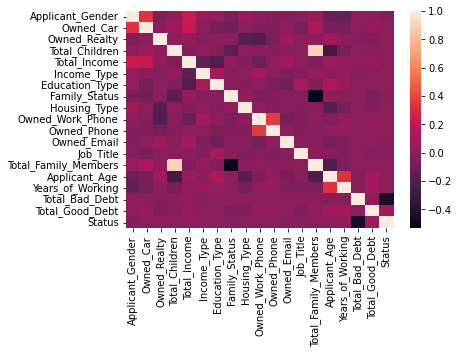

In [ ]:
#  CORRELATION AND PLOT HEATMAP

corr = x.corr()
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure()
sns.heatmap(corr)
plt.show()

# Heatmap shows very strong correlation between Features and result columns

Q. Split the data for TRAINING and SCORING (testing). OPTIONAL: Discuss what problems could happen we have poor distribution b/w training and testing?

# Part 3: Model Selection

### Q. Use the cheat sheet below to choose the algorithm/estimator suitable for building a model to address your candidate question(s)

* https://scikit-learn.org/stable/tutorial/machine_learning_map/

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x, y,
                             test_size=0.2, random_state=42)

In [ ]:
y.value_counts()

1    25007
0      121
Name: Status, dtype: int64

In [ ]:


# xtrain,xtest, ytrain,ytest = train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC


ntree1, ntree2 = 50,100
from sklearn.metrics import accuracy_score
#for algo in [RandomForestClassifier(n_estimators=ntree1)]:
# model = algo
for algo in [RandomForestClassifier(n_estimators=ntree1), RandomForestClassifier(n_estimators=ntree2), GaussianNB(), DecisionTreeClassifier(), KNeighborsClassifier()]:
  model = algo
  model.fit(xtrain, ytrain)
  predictions = model.predict(xtest)
  print(accuracy_score(predictions, ytest))

1.0
1.0
1.0
1.0
0.9958217270194986


In [ ]:
# ALL PREDICTION SEEM TO GIVE PERFECT SCORE APART FROM KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier
final_model = KNeighborsClassifier()
final_model.fit(xtrain,ytrain)
p = final_model.predict(xtest)
print(accuracy_score(p, ytest))

0.9958217270194986


In [ ]:
from joblib import dump
dump(final_model, 'application_result')

['application_result']

In [ ]:
import sklearn
sklearn.__version__

'1.0.2'

In [ ]:
                                                              #VISUALIZATION

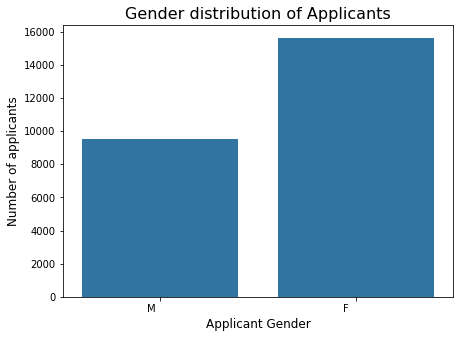

In [90]:
# Gender Distribution:
plt.figure(figsize=[7,5]);
color = sb.color_palette()[0]
sb.countplot(data = data, x = "Applicant_Gender", color = color);
plt.xlabel("Applicant Gender", size = 12);
plt.ylabel("Number of applicants", size = 12);
plt.title("Gender distribution of Applicants", size = 16);

In [ ]:
#  FEMALE REPRESENTED MORE THAN MALE

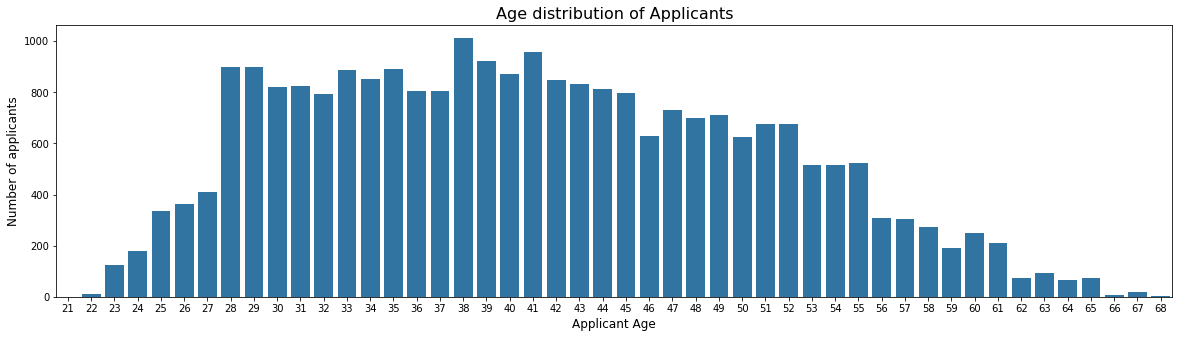

In [91]:
# Age Distribution:
plt.figure(figsize=[20,5]);
color = sb.color_palette()[0]
sb.countplot(data = data, x = "Applicant_Age", color = color);
plt.xlabel("Applicant Age", size = 12);
plt.ylabel("Number of applicants", size = 12);
plt.title("Age distribution of Applicants", size = 16);

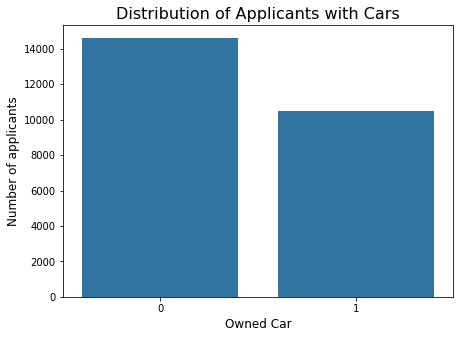

In [92]:
# Own car 
plt.figure(figsize=[7,5]);
color = sb.color_palette()[0]
sb.countplot(data = data, x = "Owned_Car", color = color);
plt.xlabel("Owned Car", size = 12);
plt.ylabel("Number of applicants", size = 12);
plt.title("Distribution of Applicants with Cars", size = 16);

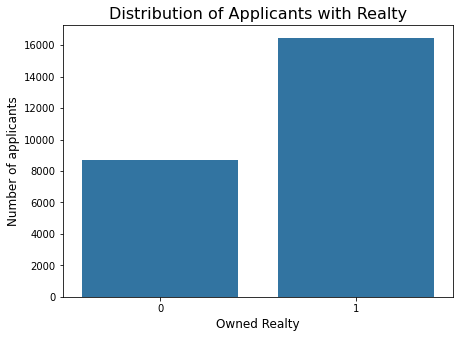

In [93]:
# Own Realty
plt.figure(figsize=[7,5]);
color = sb.color_palette()[0]
sb.countplot(data = data, x = "Owned_Realty", color = color);
plt.xlabel("Owned Realty", size = 12);
plt.ylabel("Number of applicants", size = 12);
plt.title("Distribution of Applicants with Realty", size = 16);

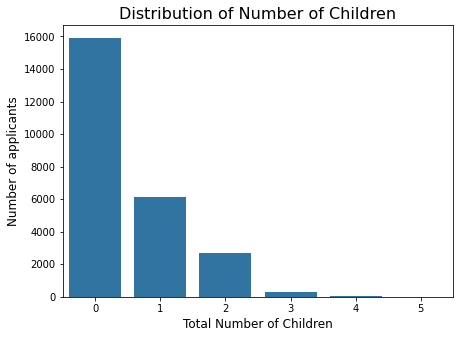

In [94]:
# Total children
plt.figure(figsize=[7,5]);
color = sb.color_palette()[0]
sb.countplot(data = data, x = "Total_Children", color = color);
plt.xlabel("Total Number of Children", size = 12);
plt.ylabel("Number of applicants", size = 12);
plt.title("Distribution of Number of Children", size = 16);

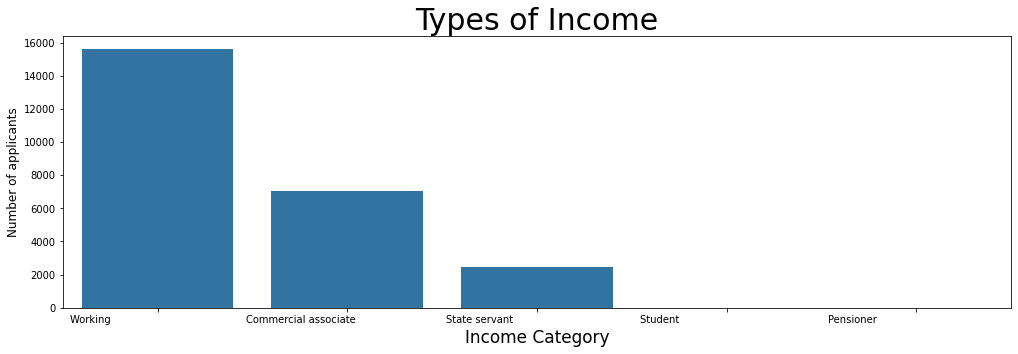

In [95]:
# Income Type
plt.figure(figsize=[17,5]);
color = sb.color_palette()[0]
sb.countplot(data = data, x = "Income_Type", color = color);
plt.xlabel("Income Category", size = 17);
plt.ylabel("Number of applicants", size = 12);
plt.title("Types of Income", size = 30);

# Part 4: Model Evaluation

### Q. Identify which of the statistical measures below are suitable for the evaluation of your model.

Classification Metrics:
* Accuracy
* Precision
* Recall
* F1 Score

Regression Metrics:
    
* Mean absolute error (MAE)
* Root mean squared error (RMSE)
* Relative absolute error (RAE)
* Relative squared error (RSE)
* Mean Zero One Error (MZOE)
* Coefficient of determination

 

# Part 5: Stretch - Model Deployment

### Q. Evaluate the open-source app framework for Machine Learning model deployment below in your own time.

* https://streamlit.io/

In [ ]:
import urllib.request
import json
import os
import ssl

def allowSelfSignedHttps(allowed):
    # bypass the server certificate verification on client side
    if allowed and not os.environ.get('PYTHONHTTPSVERIFY', '') and getattr(ssl, '_create_unverified_context', None):
        ssl._create_default_https_context = ssl._create_unverified_context

allowSelfSignedHttps(True) # this line is needed if you use self-signed certificate in your scoring service.

# Request data goes here
data = {
}

body = str.encode(json.dumps(data))

url = 'http://6c7cea71-5808-430e-aedf-23edca6594b2.eastus2.azurecontainer.io/score'
api_key = '' # Replace this with the API key for the web service
headers = {'Content-Type':'application/json', 'Authorization':('Bearer '+ api_key)}

req = urllib.request.Request(url, body, headers)

try:
    response = urllib.request.urlopen(req)

    result = response.read()
    print(result)
except urllib.error.HTTPError as error:
    print("The request failed with status code: " + str(error.code))

    # Print the headers - they include the requert ID and the timestamp, which are useful for debugging the failure
    print(error.info())
    print(error.read().decode("utf8", 'ignore'))